In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargar archivos

In [24]:
sales_2012 = pd.read_csv(r"C:\Users\tcabreraro001\Downloads\Curso Python\Preparation Data\sales_2012.csv")
sales_2013 = pd.read_csv(r"C:\Users\tcabreraro001\Downloads\Curso Python\Preparation Data\sales_2013.csv")
sales_2014 = pd.read_csv(r"C:\Users\tcabreraro001\Downloads\Curso Python\Preparation Data\sales_2014.csv")
sales_2015 = pd.read_csv(r"C:\Users\tcabreraro001\Downloads\Curso Python\Preparation Data\sales_2015.csv")
customer_address = pd.read_csv(r"C:\Users\tcabreraro001\Downloads\Curso Python\Preparation Data\customer_addresses.csv")

In [25]:
# Uno todas las fechas - Union
sales_total = pd.concat([sales_2012,sales_2013,sales_2014,sales_2015])
# Hago un merge para hacer un join 
sales_customer_details = sales_total.merge(customer_address,on="Customer ID", how="left")

## Check datatype column

In [26]:
sales_customer_details["Revenue"].describe() # dtype: object

sales_customer_details["Revenue"] = sales_customer_details["Revenue"].str.strip("$").astype("float64")
sales_customer_details["Price"] = sales_customer_details["Price"].str.strip("$").astype("float64")
sales_customer_details["Transaction Date"]=pd.to_datetime(sales_customer_details["Transaction Date"])

sales_customer_details

,Transaction ID,Transaction Date,Price,Quantity,Revenue,Product,Customer ID,Company Name,Street Address,City,State,Postal Code
0,T100000001,2012-01-01,404.46,18,7280.28,Lomina,A100021,Scotzoom,70 Bald Hill St.,Middle Village,NY,11379
1,T100000002,2012-01-01,202.23,9,1820.07,Lomina,A103221,Geombee,9 Dunbar St.,Bayside,NY,11361
2,T100000003,2012-01-01,179.76,8,1438.08,Lomina,A112321,Jalane,542 Stonybrook Street,Zion,IL,60099
3,T100000004,2012-01-01,831.39,37,30761.43,Lomina,A122321,Cansolis,166 East Richardson St.,Pensacola,FL,32503
4,T100000005,2012-01-01,1101.03,49,53950.47,Lomina,A123921,Squidbeat,9427 Big Rock Cove Ave.,Shelbyville,TN,37160
...,...,...,...,...,...,...,...,...,...,...,...,...
4450,T100004441,2015-12-01,3419.72,4,13678.88,Samtan,A186921,Cogicero,54 Stillwater Drive,Cookeville,TN,38501
4451,T100004442,2015-12-01,5129.58,6,30777.48,Samtan,A130021,Hextech,543 School Street,Virginia Beach,VA,23451
4452,T100004443,2015-12-01,5129.58,6,30777.48,Samtan,A132821,Animive,8991 Brickyard Ave.,Langhorne,PA,19047
4453,T100004444,2015-12-01,5129.58,6,30777.48,Samtan,A155621,Kinplex,299 Fremont Street,Saint Cloud,MN,56301


In [27]:
# Busco outliers
sales_customer_details[sales_customer_details["Transaction Date"]>"2015-12-31"]

,Transaction ID,Transaction Date,Price,Quantity,Revenue,Product,Customer ID,Company Name,Street Address,City,State,Postal Code
4158,T100004149,2051-11-01,640.93,1,640.93,Lomina,A147921,Fixziming,37 North Ramblewood St.,Ephrata,PA,17522


In [28]:
# Busco outliers
sales_customer_details[sales_customer_details["Transaction Date"]<"2012-01-01"]

,Transaction ID,Transaction Date,Price,Quantity,Revenue,Product,Customer ID,Company Name,Street Address,City,State,Postal Code


In [29]:
# Cambio de 2051 a 2015 ya que el usuario se debe haber equivocado en el momento de escribirlo
sales_customer_details.loc[4158,"Transaction Date"]='2015-11-01 00:00:00'

In [30]:
# Seleccionando columnas
sales_customer_details[["Transaction ID","Price", "Revenue"]]

,Transaction ID,Price,Revenue
0,T100000001,404.46,7280.28
1,T100000002,202.23,1820.07
2,T100000003,179.76,1438.08
3,T100000004,831.39,30761.43
4,T100000005,1101.03,53950.47
...,...,...,...
4450,T100004441,3419.72,13678.88
4451,T100004442,5129.58,30777.48
4452,T100004443,5129.58,30777.48
4453,T100004444,5129.58,30777.48


## Chequeo valores nulos

In [31]:
# Utilizo el metodo isna() o isnull()
sales_customer_details.isna().sum() 

Transaction ID       0
Transaction Date     0
Price                0
Quantity             0
Revenue              0
Product             13
Customer ID          0
Company Name         0
Street Address       0
City                 0
State                0
Postal Code          0
dtype: int64

In [32]:
# Limpio los valores nulos de Product
nulls = sales_customer_details[sales_customer_details['Product'].isna()]
no_nulls = sales_customer_details[~sales_customer_details['Product'].isna()]

nulls[["Price", "Quantity"]].mean()

Price       548.992308
Quantity     22.307692
dtype: float64

In [33]:
#sales_customer_details.groupby(sales_customer_details["Product"]).mean()
no_nulls.groupby(sales_customer_details["Product"]).mean()

,Price,Quantity,Revenue,Postal Code
Product,,,,
Lomina,1681.861591,23.978697,27210.724167,33721.615915
Lominade,292.110000,13.000000,3797.430000,19047.000000
Samatan,854.930000,1.000000,854.930000,22554.000000
Samtan,8986.098278,4.293051,28513.269486,34092.106747
Tridesta,8080.819378,66.469722,411878.777578,37204.918167
Tridestand,1302.190000,28.000000,36461.320000,11520.000000
Wedicare,9466.443201,54.261116,831888.498036,32978.857720
Wediicare,1874.640000,31.000000,58113.840000,48103.000000
ufbbq,854.930000,1.000000,854.930000,11379.000000


In [34]:
# Observamos que el promedio en Quantity del producto Lomina es bastante similar, asi que puede haber relacion alli

In [35]:
# Agrego los valores que no tenian nombre de producto a "Lomina" y chequeo que no hay mas nulls (osea que ya se cargaron)

sales_customer_details["Product"].fillna("Lomina", inplace=True)
sales_customer_details.isna().sum()

Transaction ID      0
Transaction Date    0
Price               0
Quantity            0
Revenue             0
Product             0
Customer ID         0
Company Name        0
Street Address      0
City                0
State               0
Postal Code         0
dtype: int64

# Encontrar duplicados

In [36]:
# Primero hago la busqueda general y hago un drop() luego hago busqueda por ID y veo si el usuario quizas se equivoco nomas

# Categorical Value Errors

In [37]:
# Puede ser que los usuarios nos ingresen valores categoricos con distintos nombres o etiquetas
sales_customer_details["Product"].value_counts()

Lomina        1609
Wedicare      1237
Samtan         993
Tridesta       611
ufbbq            1
Tridestand       1
Wediicare        1
Samatan          1
Lominade         1
Name: Product, dtype: int64

In [38]:
# Nuestro deber es fusionar estos datos
replacements = {
    "Lominade":"Lomina",
    "Tridestand":"Tridesta",
    "Samatan":"Samtan",
    "Wediicare":"Wedicare"
}
sales_customer_details = sales_customer_details.replace(replacements)
sales_customer_details["Product"].value_counts()

Lomina      1610
Wedicare    1238
Samtan       994
Tridesta     612
ufbbq          1
Name: Product, dtype: int64

In [39]:
# Como no puedo dropear donde "Product" == "ufbbq" entonces armo una lista con los valores que quiero ver y se la paso al DF
products=["Lomina","Samtan","Tridesta","Wedicare"]
sales_customer_details=sales_customer_details[sales_customer_details["Product"].isin(products)]
sales_customer_details["Product"].value_counts()

Lomina      1610
Wedicare    1238
Samtan       994
Tridesta     612
Name: Product, dtype: int64

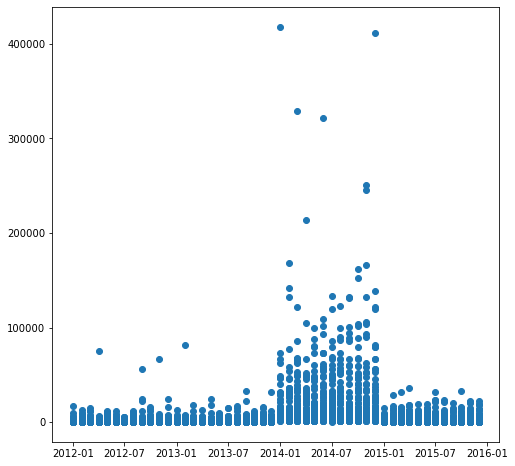

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(sales_customer_details["Transaction Date"],sales_customer_details["Price"])